DESCRIZIONE DELLA METRICA

In [7]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import pandas as pd
import mafContrib
from mafContrib import PeriodicStarMetric 
from mafContrib  import TransientAsciiMetric

In [8]:
# Read the field list.
fields = pd.read_csv('field_list.csv')
# what does the field list look like?
#fields[0:5]


In [9]:
runName = 'baseline2018a'
dbFile = 'baseline2018a.db'
opsdb = db.OpsimDatabase(dbFile)


mjdcol = 'observationStartMJD'
degrees = True

outDir = 'Transients'
resultsDb = db.ResultsDb(outDir=outDir)

In [57]:
#le coordinate di M54/Sagittarius
ra_Sag = [283.763641]
dec_Sag = [-30.478501]
Sag_coo = (283.763641, -30.478501)
#le coordinate di Sculptor
ra_Sc = [15.038984]
dec_Sc = [-33.709029]
Sc_coo = (15.038984,-33.7090278 )
#le coordinate di Carina
ra_Ca = [100.402888]
dec_Ca = [-50.966196]
Ca_coo = (100.402888,-50.966196)
#le coordinate di Fornax
ra_Fo = [39.997200]
dec_Fo = [-34.449187]
Fo_coo = (39.997200,-34.449187)
#le coordinate di Phoenix
ra_Ph = [27.776421]
dec_Ph = [-44.444686]
Ph_coo = (27.776421,-44.444686)
#le coordinate di Antlia 2
ra_An = [143.8868]
dec_An = [-36.7673]
An_coo = (143.8868,-36.7673)

ra=(283.763641,15.038984,100.402888,39.997200,27.776421,143.8868)
dec=(-30.478501,-33.709029,-50.966196,-34.449187,-44.444686,-36.7673)

In [66]:
#Choose the fields around selected dwarf galaxies
Sag = fields.query('(((ra-@Sag_coo[0])**2 + (dec-@Sag_coo[1])**2)**0.5) < 1.5')
Sc = fields.query('(((ra-@Sc_coo[0])**2 + (dec-@Sc_coo[1])**2)**0.5) < 1.5')
Ca = fields.query('(((ra-@Ca_coo[0])**2 + (dec-@Ca_coo[1])**2)**0.5) < 1.5')
Fo = fields.query('(((ra-@Fo_coo[0])**2 + (dec-@Fo_coo[1])**2)**0.5) < 1.5')
Ph = fields.query('(((ra-@Ph_coo[0])**2 + (dec-@Ph_coo[1])**2)**0.5) < 1.5')
An = fields.query('(((ra-@An_coo[0])**2 + (dec-@An_coo[1])**2)**0.5) < 1.8')
wfd = fields.query('(dec >= -72.25) and (dec <= 12.4) and ((gb >= 15) or (gb <= -15))')

#Distance
mu_sc= 19.57 
Ebv_sc = 0.016

mu_ca=20.08 
Ebv_ca=0.05

mu_fo=20.70
Ebv_fo=0.02

mu_ph=23.10 
Ebv_ph= 0.014

mu_an=
Ebv_an= 

print("The number of fields taround Sagittarius is %d" % (len(Sag)))
print("The number of fields around Sculptor is %d" % (len(Sc)))
print("The number of fields around Carina is %d" % (len(Ca)))
print("The number of fields around Fornax is %d" % (len(Fo)))
print("The number of fields around Phoenix is %d" % (len(Ph)))
print("The number of fields around Antalia is %d" % (len(An)))

The number of fields taround Sagittarius is 1
The number of fields around Sculptor is 1
The number of fields around Carina is 1
The number of fields around Fornax is 1
The number of fields around Phoenix is 1
The number of fields around Antalia is 1


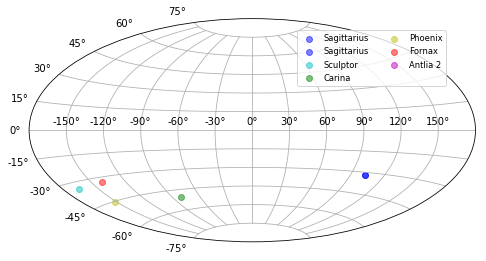

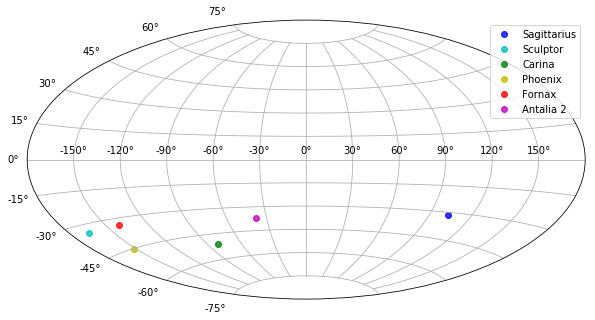

In [69]:
def radec2project(ra, dec):
    return (np.radians(ra) - np.pi, np.radians(dec))

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection="aitoff")
#ax.scatter(x, y, alpha=0.5)
#x, y = radec2project(wfd.ra, wfd.dec)
#ax.scatter(x, y, alpha=0.5, color='r')

x, y = radec2project(Sag.ra, Sag.dec)
ax.scatter(x, y, alpha=0.8, color='B', label='Sagittarius')
x, y = radec2project(Sc.ra, Sc.dec)
ax.scatter(x, y, alpha=0.8, color='C', label='Sculptor')
x, y = radec2project(Ca.ra, Ca.dec)
ax.scatter(x, y, alpha=0.8, color='G', label='Carina')
x, y = radec2project(Ph.ra, Ph.dec)
ax.scatter(x, y, alpha=0.8, color='Y', label='Phoenix')
x, y = radec2project(Fo.ra, Fo.dec)
ax.scatter(x, y, alpha=0.8, color='R', label='Fornax')
x, y = radec2project(An.ra, An.dec)
ax.scatter(x, y, alpha=0.8, color='M', label='Antalia 2')
plt.legend(loc='upper right', fancybox=True)
plt.grid(True)
plt.savefig('WP_fig1.eps')

In [13]:
Sag

,fieldId,fov,ra,dec,gl,gb,el,eb
1253,1254,3.5,283.032991,-31.621145,4.270954,-13.967261,-78.729821,-8.687872


In [14]:
Sc

,fieldId,fov,ra,dec,gl,gb,el,eb
1181,1182,3.5,13.56019,-33.824705,-62.046153,-83.276434,-2.958549,-36.029344


In [15]:
Ca

,fieldId,fov,ra,dec,gl,gb,el,eb
586,587,3.5,99.135906,-50.859846,-100.23295,-22.963612,110.908935,-73.63772


In [16]:
Ph

,fieldId,fov,ra,dec,gl,gb,el,eb
771,772,3.5,28.020715,-45.277906,-86.766504,-68.194231,1.975004,-51.572209


In [17]:
Fo

,fieldId,fov,ra,dec,gl,gb,el,eb
1201,1202,3.5,39.373666,-33.1466,-125.864948,-66.364555,22.699556,-45.474453


In [70]:
An

,fieldId,fov,ra,dec,gl,gb,el,eb
1027,1028,3.5,142.225127,-37.272608,-95.72384,9.965373,161.906521,-48.549717


In [80]:
#Sql
year_start=0
year_finish=2
sql = 'night between %d and %d' % (365.25 * year_start, 365.25 * year_finish)
#sqlconstraint = 'night < 365 and filter="g"'

In [19]:
#Slicers
slicer_Sag = slicers.UserPointsSlicer(ra=ra_Sag,dec=dec_Sag)
slicer_Sc = slicers.UserPointsSlicer(ra=ra_Sc,dec=dec_Sc)
slicer_Ca = slicers.UserPointsSlicer(ra=ra_Ca,dec=dec_Ca)
slicer_Fo = slicers.UserPointsSlicer(ra=ra_Fo,dec=dec_Fo)
slicer_Ph = slicers.UserPointsSlicer(ra=ra_Ph,dec=dec_Ph)

slicer_All=slicers.UserPointsSlicer(ra=ra,dec=dec)

In [ ]:
#How many visits in the selected fields


In [72]:
metric=metrics.PassMetric(cols=[mjdcol, 'fiveSigmaDepth', 'filter'])
slicer_Sag = slicers.UserPointsSlicer(ra=ra_Sag,dec=dec_Sag)
slicer_Sc = slicers.UserPointsSlicer(ra=ra_Sc,dec=dec_Sc)
slicer_Ca = slicers.UserPointsSlicer(ra=ra_Ca,dec=dec_Ca)
slicer_Fo = slicers.UserPointsSlicer(ra=ra_Fo,dec=dec_Fo)
slicer_Ph = slicers.UserPointsSlicer(ra=ra_Ph,dec=dec_Ph)
slicer_An = slicers.UserPointsSlicer(ra=ra_An,dec=dec_An)
#Choose dwarf:

bundle = metricBundles.MetricBundle(metric, slicer_Sag, sql, runName=runName)
bgroup = metricBundles.MetricBundleGroup(
    {0: bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint night between 0 and 730 for columns ['observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'filter']
Found 453105 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


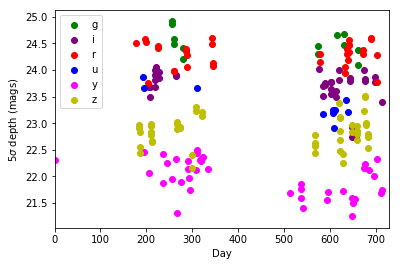

In [78]:
mv = bundle.metricValues[0]
filters = np.unique(bundle.metricValues[0]['filter'])
colors = {'u': 'b','g': 'g','r': 'r',
          'i': 'purple',"z": 'y',"y": 'magenta'}
for filterName in filters:
    good = np.where(mv['filter'] == filterName)
    plt.scatter(mv[mjdcol][good]-mv[mjdcol].min(),
                mv['fiveSigmaDepth'][good],
                c=colors[filterName], label=filterName)


plt.xlabel('Day')
plt.ylabel('5$\sigma$ depth (mags)')
plt.xlim([365*year_start,365*year_finish])
plt.legend(scatterpoints=1)
plt.savefig('WP_fig2.eps')



In [79]:
print('%i Observations total at this point (All SNR levels)' % (
    bundle.metricValues.data[0].size))
for fname in filters:
    good = np.where(bundle.metricValues.data[0]['filter'] == fname)
    print('%i Observations in %s' % (good[0].size, fname))

183 Observations total at this point (All SNR levels)
13 Observations in g
37 Observations in i
33 Observations in r
11 Observations in u
41 Observations in y
48 Observations in z


Now we use a modified version of PeriodicStarFit notebook to understand if RR Lyrae and Delta scuty are recovered at the distance of each dwarf

In [ ]:
#Typical periods and amplitude for type c RR Lyrae
#RP_RRc = {0.3,0.32,0.35}
#RA_RRc = {0.3,0.3,0.27}
#compute absolute magnitudes  in ugrizy of RRc from OGLE observations in Magellanic Clouds (and we assume 18.5 and 0.08 for the distance modulus and reddening of LMC ).
I_RRc_lmc = 18.9
V_RRc_lmc = 19.2
Vi = V_RRc_lmc - (2.742 * 0.08) - 18.5   
Ii = I_RRc_lmc - (1.505 * 0.08) - 18.5

ii = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi = ii+ 1.481*(Vi-Ii) - 0.536
ri = (1/0.565) * (Vi-0.435*gi + 0.016)
ui = gi + 0.575
zi = ii - 0.013
yi = zi

mu_scu= 19.57 
Ebv_scu = 0.016

mu_ca=20.08 
Ebv_ca=0.05

mu_fo=20.70
Ebv_fo=0.02

mu_ph=23.10 
Ebv_ph= 0.014




distMod= [mu_scu,mu_scu,mu_ca,mu_fo,mu_ph]
nmod=len(distMod)


ra = np.repeat(ra, nmod)
dec = np.repeat(dec, nmod)
distMod = np.tile(distMod, nmod)

print('Distance Moduli that will be added to the mean magnitudes', distMod)


Querying database SummaryAllProps with constraint night < 365*2 for columns ['observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'filter']
Found 452269 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365*2" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:303: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn('Histogram range was single-valued; expanding default range.')
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:66: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))


Plotting complete.


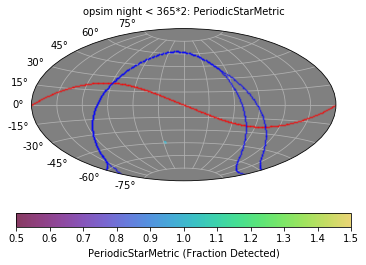

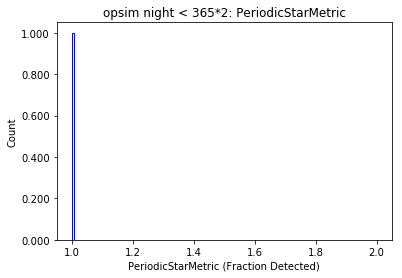

In [29]:
#RRC della galassia:
mu_scu= 19.57 
Ebv_scu = 0.016

mu_ca=20.08 
Ebv_ca=0.05

mu_fo=20.70
Ebv_ca=0.02

mu_ph=23.10 
Ebv_ph= 0.014

mu_gal =mu_scu
Ebv_gal =Ebv_scu

#RP_RRc = {0.3,0.32,0.35}
#RA_RRc = {0.3,0.3,0.27}
I_RRc_lmc = 18.9
V_RRc_lmc = 19.2

Vi = V_RRc_lmc - (2.742 * 0.08) - 18.5   
Ii = I_RRc_lmc - (1.505 * 0.08) - 18.5

ii = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi = ii+ 1.481*(Vi-Ii) - 0.536
ri = (1/0.565) * (Vi-0.435*gi + 0.016)
ui = gi + 0.575
zi = ii - 0.013
yi = zi

u_gal = ui + mu_gal + 4.145 * Ebv_gal
g_gal = gi + mu_gal + 3.237 * Ebv_gal
r_gal = ri + mu_gal + 2.273 * Ebv_gal
i_gal = ii + mu_gal + 1.684 * Ebv_gal
z_gal = zi + mu_gal + 1.323 * Ebv_gal
y_gal = yi + mu_gal + 1.088 * Ebv_gal

#E poi utilizziamo la Periodic star Metric per capire se prende RR
metric_recRR = PeriodicStarMetric(period=0.3,amplitude=0.3,phase=2.,
                 nMonte=100, periodTol=0.05, ampTol=0.10, means=[u_gal,g_gal,r_gal,i_gal,z_gal,y_gal,],
                 magTol=0.10, nBands=6,)

bundle_recRR = metricBundles.MetricBundle(metric_recRR,slicer,sql)
bg_recRR =  metricBundles.MetricBundleGroup({0:bundle_recRR}, opsdb,
                                      outDir=outDir, resultsDb=resultsDb)
bg_recRR.runAll()
bg_recRR.plotAll(closefigs=False)

In [ ]:
fracRecovered

Querying database SummaryAllProps with constraint night < 365*2 for columns ['observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'filter']
Found 452269 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365*2" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:303: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn('Histogram range was single-valued; expanding default range.')
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:66: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))


Plotting complete.


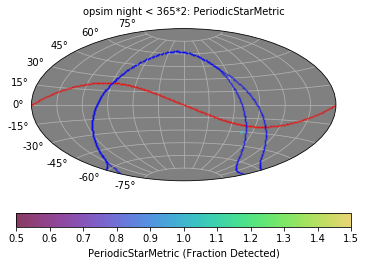

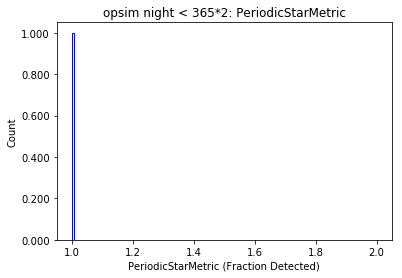

In [30]:
#RRab della galassia:
mu_scu= 19.57 
Ebv_scu = 0.016

mu_ca=20.08 
Ebv_ca=0.05

mu_fo=20.70
Ebv_ca=0.02

mu_ph=23.10 
Ebv_ph= 0.014

mu_gal =mu_scu
Ebv_gal =Ebv_scu
#P_RRab = {0.48 0.52 0.56 0.62 0.68}
#A_RRab = {0.85 0.70 0.55 0.40 0.25}
#AI_RRab_lmc = {19 19 18.9 18.9 18.8}
#AV_RRab_lmc = {19.4 19.4 19.4 19.4 19.4}

I_RRab_lmc = 18.9
V_RRab_lmc = 19.4

Vi = V_RRab_lmc - (2.742 * 0.08) - 18.5   
Ii = I_RRab_lmc - (1.505 * 0.08) - 18.5

ii = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi = ii+ 1.481*(Vi-Ii) - 0.536
ri = (1/0.565) * (Vi-0.435*gi + 0.016)
ui = gi + 0.575
zi = ii - 0.013
yi = zi

u_gal = ui + mu_gal + 4.145 * Ebv_gal
g_gal = gi + mu_gal + 3.237 * Ebv_gal
r_gal = ri + mu_gal + 2.273 * Ebv_gal
i_gal = ii + mu_gal + 1.684 * Ebv_gal
z_gal = zi + mu_gal + 1.323 * Ebv_gal
y_gal = yi + mu_gal + 1.088 * Ebv_gal

#E poi utilizziamo la Periodic star Metric per capire se prende RR (le c le modello con period=0.3,amplitude=0.3 e le ab period=0.8,amplitude=1.3)
metric_recRRab = PeriodicStarMetric(period=0.56,amplitude=0.55,phase=2.,
                 nMonte=100, periodTol=0.05, ampTol=0.10, means=[u_gal,g_gal,r_gal,i_gal,z_gal,y_gal,],
                 magTol=0.10, nBands=6,)
bundle_recRRab = metricBundles.MetricBundle(metric_recRRab,slicer_Sag,sql)
bg_recRRab =  metricBundles.MetricBundleGroup({0:bundle_recRRab}, opsdb,
                                      outDir=outDir, resultsDb=resultsDb)
bg_recRRab.runAll()
bg_recRRab.plotAll(closefigs=False)

Querying database SummaryAllProps with constraint night < 365*2 for columns ['observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'filter']
Found 452269 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Re-saving metric bundles.
Plotting figures with "night < 365*2" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:303: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn('Histogram range was single-valued; expanding default range.')
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:66: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))


Plotting complete.


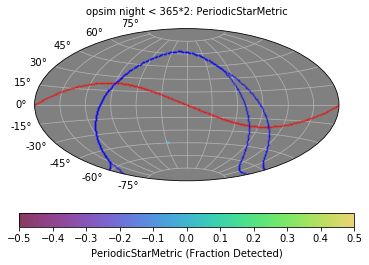

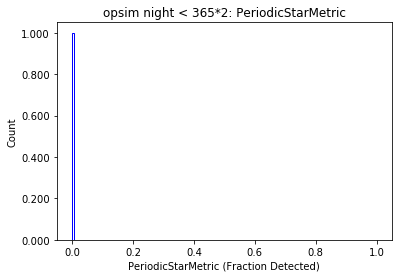

In [34]:
#Delta Scuti  della galassia:
mu_scu= 19.57 
Ebv_scu = 0.016

mu_ca=20.08 
Ebv_ca=0.05

mu_fo=20.70
Ebv_ca=0.02

mu_ph=23.10 
Ebv_ph= 0.014

mu_gal =mu_ph
Ebv_gal =Ebv_ph
#P_dS = {0.02 0.03 0.05 0.08 0.12 0.2}
#A_dS = {0.02 0.04 0.08 0.10 0.12 0.14 0.16 0.18 0.2}
#V_dS_lmc = {22.25 21.72 21.20 20.67 20.14 19.61}
#I_dS_lmc = {21.75 21.22 20.7 20.17 19.64 19.11}

I_DS_lmc = 21.75
V_DS_lmc = 22.25

Vi = V_DS_lmc - (2.742 * 0.08) - 18.5   
Ii = I_DS_lmc - (1.505 * 0.08) - 18.5

ii = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi = ii+ 1.481*(Vi-Ii) - 0.536
ri = (1/0.565) * (Vi-0.435*gi + 0.016)
ui = gi + 0.575
zi = ii - 0.013
yi = zi

u_gal = ui + mu_gal + 4.145 * Ebv_gal
g_gal = gi + mu_gal + 3.237 * Ebv_gal
r_gal = ri + mu_gal + 2.273 * Ebv_gal
i_gal = ii + mu_gal + 1.684 * Ebv_gal
z_gal = zi + mu_gal + 1.323 * Ebv_gal
y_gal = yi + mu_gal + 1.088 * Ebv_gal



#E poi utilizziamo la Periodic star Metric per capire se prende RR (le c le modello con period=0.3,amplitude=0.3 e le ab period=0.8,amplitude=1.3)
metric_recRRab = PeriodicStarMetric(period=0.2,amplitude=0.2,phase=2.,
                 nMonte=100, periodTol=0.01, ampTol=0.01, means=[u_gal,g_gal,r_gal,i_gal,z_gal,y_gal,],
                 magTol=0.10, nBands=6,)
bundle_recRRab = metricBundles.MetricBundle(metric_recRRab,slicer,sql)
bg_recRRab =  metricBundles.MetricBundleGroup({0:bundle_recRRab}, opsdb,
                                      outDir=outDir, resultsDb=resultsDb)
bg_recRRab.runAll()
bg_recRRab.writeAll()
bg_recRRab.plotAll(closefigs=False)

In [37]:
# Set RA, Dec for a single point in the sky. in radians.
# TUTTE LE GALASSIE INSIEME, RRC
#RP_RRc = {0.3,0.32,0.35}
#RA_RRc = {0.3,0.3,0.27}
I_RRc_lmc = 18.9
V_RRc_lmc = 19.2

Vi = V_RRc_lmc - (2.742 * 0.08) - 18.5   
Ii = I_RRc_lmc - (1.505 * 0.08) - 18.5

ii = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi = ii+ 1.481*(Vi-Ii) - 0.536
ri = (1/0.565) * (Vi-0.435*gi + 0.016)
ui = gi + 0.575
zi = ii - 0.013
yi = zi

mu_scu= 19.57 
Ebv_scu = 0.016

mu_ca=20.08 
Ebv_ca=0.05

mu_fo=20.70
Ebv_fo=0.02

mu_ph=23.10 
Ebv_ph= 0.014




distMod= [mu_scu,mu_scu,mu_ca,mu_fo,mu_ph]
nmod=len(distMod)


ra = np.repeat(ra, nmod)
dec = np.repeat(dec, nmod)
distMod = np.tile(distMod, nmod)

print('Distance Moduli that will be added to the mean magnitudes', distMod)


Distance Moduli that will be added to the mean magnitudes [ 19.57  19.57  20.08  20.7   23.1   19.57  19.57  20.08  20.7   23.1
  19.57  19.57  20.08  20.7   23.1   19.57  19.57  20.08  20.7   23.1
  19.57  19.57  20.08  20.7   23.1 ]


In [46]:
# Note I turned nMonte way down for speed
metric = PeriodicStarMetric(period=0.2, amplitude=0.9, phase=2.,
                            nMonte=10, periodTol=0.001, ampTol=0.001, means=[ui,gi,ri,ii,zi,yi],
                            magTol=0.001, nBands=2)

plotDict = {'colorMin': 0, 'colorMax': 1, 'xMin': 0, 'xMax': 1}
slicer = slicers.UserPointsSlicer(ra,dec,lonCol='fieldRA',latCol='fieldDec')
slicer.slicePoints['distMod'] = distMod

bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                      outDir=outDir, resultsDb=resultsDb)

bg.runAll()

Querying database SummaryAllProps with constraint night < 365*2 for columns ['observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'filter']
Found 452269 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [47]:
bundle.metricValues


masked_array(data = [0.7 1.0 0.6 0.6 0.3 1.0 1.0 0.9 0.4 0.7 0.8 0.8 0.7 0.9 0.8 1.0 1.0 0.7
 0.7 0.4 0.9 1.0 0.7 0.5 0.4],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False],
       fill_value = -666.0)

Plotting figures with "night < 365*2" constraint now.
Plotting complete.


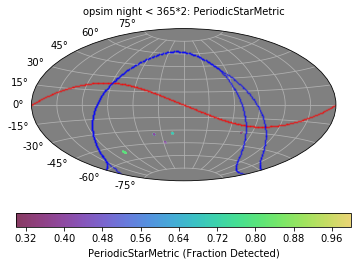

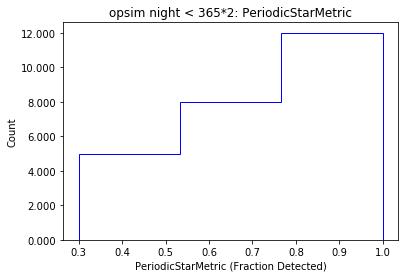

In [48]:

bg.plotAll(closefigs=False)

In [ ]:
# Note I turned nMonte way down for speed
metric = PeriodicStarMetric(period=0.2, amplitude=0.9, phase=2.,
                            nMonte=10, periodTol=0.001, ampTol=0.001, means=[ui,gi,ri,ii,zi,yi],
                            magTol=0.001, nBands=2)

slicer = slicers.UserPointsSlicer(ra,dec)
slicer.slicePoints['distMod'] = distMod
bundle = metricBundles.MetricBundle(metric,slicer,sqlconstraint)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                      outDir=outDir, resultsDb=resultsDb)


In [ ]:
bg.runAll()

In [ ]:
#questo un esempio preso da Transient ascci metric con la curva 2013ab_1.dat
asciiLC = '2013ab_1.dat'
transMetric = TransientAsciiMetric(asciiLC, surveyDuration=1,mjdCol='observationStartMJD', 
                                   detectSNR={'u': 5, 'g': 5, 'r': 5, 'i': 5, 'z': 5, 'y': 5},
                                   nPreT=0, preT=0, nFilters=0, filterT=None, nPerLC=0, peakOffset=0,
                                   dataout=True)
filterNames = ['u', 'g', 'r', 'i', 'z', 'y']
times = np.arange(0, transMetric.transDuration, 0.5)
lc = {}
for f in filterNames:
    lc[f] = transMetric.make_lightCurve(times, np.array([f]*len(times)))

plt.figure()
for f in filterNames:
    plt.plot(times, lc[f], color=colors[f], label=f)
plt.ylim(23, 17)
plt.xlabel('Epoch (days)')
plt.ylabel('Magnitude')
plt.legend(fontsize='smaller', numpoints=1)

lightcurve_metric = metricBundles.MetricBundle(transMetric, slicer, sqlconstraint, runName=runName)
# run the metric
bgroup = metricBundles.MetricBundleGroup({0: lightcurve_metric}, opsdb, 
                                         outDir=outDir, resultsDb=resultsDb)
bgroup.runAll() 


for i, data in enumerate(lightcurve_metric.metricValues):
    for lcN in np.unique(data['lcNumber']):
        match = np.where(data['lcNumber'] == lcN)
        plt.figure()
        epoch = data['epoch'][match]
        mjd = data['expMJD'][match]
        mags = data['lcMag'][match]
        filters = data['filter'][match]
        for f in filterNames:
            filtermatch = np.where(filters == f)
            plt.plot(times - epoch[0] + mjd[0], lc[f], color=colors[f])
            plt.plot(mjd[filtermatch], mags[filtermatch], 'o', color=colors[f], label=f)
        plt.ylim(plt.ylim()[::-1])
        plt.xlim(times[0] - epoch[0] + mjd[0] - 2, times[0] - epoch[0] + mjd[0] + 192)
        plt.legend(ncol = 2, loc = (.8,.8), numpoints=1, fontsize='smaller') 
        plt.xlabel('MJD')
        plt.ylabel('Mags')
        plt.title('Field *%d at %f/%f, lightcurve %d' % (i, np.degrees(slicer.slicePoints['ra'][i]), 
                                                        np.degrees(slicer.slicePoints['dec'][i]), lcN))
        plt.show()            

In [ ]:
#Questa e' quella di bellCalculate the survey depth where a variable star can be reliably identified through a comparsion
#of the measured variance to the measurement uncertainty.
from lsst.sims.maf.metrics import BaseMetric
from scipy.stats import chi2
from scipy.interpolate import UnivariateSpline, interp1d
metric = VarDepth('fiveSigmaDepth',numruns=100, signal = 0.2) #Note: default numruns=10000 takes way too long.
myBundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
bgroup = metricBundles.MetricBundleGroup({0: myBundle}, opsdb, outDir='newmetric_test', resultsDb=None)
bgroup.runAll()
myBundle.setPlotDict({'colorMin':16.1, 'colorMax':24.5})
bgroup.plotAll(closefigs=False,dpi=600,figformat='png')


In [ ]:
#Variability Metrics (per evidenziare le gap e quanto un periodo lo si riesce a prendere con la cadenza che  hai, credo che lo faccia per le visite in una notte)
from lsst.sims.maf.metricBundles import MetricBundle, MetricBundleGroup
phaseMetric = metrics.PhaseGapMetric(nPeriods=20, periodMin=0.2, periodMax=1.2)
periodMetric = mafContrib.PeriodDeviationMetric(nPeriods=2, periodMin=0.2, periodMax=1.2)
phaseslicer = slicers.HealpixSlicer(nside=4, lonCol='hexDitherPerNightRa', latCol='hexDitherPerNightDec')
periodslicer = slicers.HealpixSlicer(nside=4, lonCol='hexDitherPerNightRa', latCol='hexDitherPerNightDec')
sqlconstraint = 'night<365*%d' %nanni
summaryMetrics = [metrics.MinMetric(), metrics.MaxMetric(), metrics.MeanMetric()]
phaseBundle = MetricBundle(phaseMetric, phaseslicer, sqlconstraint, 
                           runName=runName, summaryMetrics=summaryMetrics)
periodBundle = MetricBundle(periodMetric, periodslicer, constraint=sqlconstraint, 
                            runName=runName, summaryMetrics=summaryMetrics)
bdict = {'Phase':phaseBundle, 'Period':periodBundle}
resultsDb = db.ResultsDb(outDir=outDir)
bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

In [ ]:
bgroup.plotAll(closefigs=False)

In [ ]:
def count_number(x, y, xbinsize=None, ybinsize=None, nxbins=None, nybins=None):
    # Set up grid for contour/density plot.
    xmin = min(x)
    ymin = min(y)
    if (xbinsize!=None) & (ybinsize!=None):
        xbins = np.arange(xmin, max(x), xbinsize)
        ybins = np.arange(ymin, max(y), ybinsize)
        nxbins = xbins.shape[0]
        nybins = ybins.shape[0]
    elif (nxbins!=None) & (nybins!=None):
        xbinsize = (max(x) - xmin)/float(nxbins)
        ybinsize = (max(y) - ymin)/float(nybins)
        xbins = np.arange(xmin, max(x), xbinsize)
        ybins = np.arange(ymin, max(y), ybinsize)
        nxbins = xbins.shape[0]
        nybins = ybins.shape[0]
    else:
        raise Exception("Must specify both of either xbinsize/ybinsize or nxbins/nybins")
    counts = np.zeros((nybins, nxbins), dtype='int')
    # Assign each data point (x/y) to a bin.
    for i in range(len(x)):
        xidx = min(int((x[i] - xmin)/xbinsize), nxbins-1)
        yidx = min(int((y[i] - ymin)/ybinsize), nybins-1)
        counts[yidx][xidx] += 1
    # Create 2D x/y arrays, to match 2D counts array.
    xi, yi = np.meshgrid(xbins, ybins)
    return xi, yi, counts

In [ ]:
nperiods = len(phaseBundle.metricValues[-1:][0]['periods'])
periods = []
phaseGaps = []
for mval in phaseBundle.metricValues.compressed():
    for p, pGap in zip(mval['periods'], mval['maxGaps']):
            periods.append(p)
            phaseGaps.append(pGap)

periods = np.array(periods, 'float')
phaseGaps = np.array(phaseGaps, 'float')
timeGaps = phaseGaps * periods

periodi, phasegapi, counts = count_number(periods, phaseGaps, nxbins=100, nybins=100)
plt.figure()
levels = np.log10(np.arange(0.1, 200, 1))
plt.contourf(periodi, phasegapi, np.log10(counts), levels, extend='max')
cbar = plt.colorbar()
cbar.set_label('logN')
plt.xlabel('Period (days)')
plt.ylabel('Largest Phase gap')

In [ ]:
nperiods = len(periodBundle.metricValues[-1:][0]['periods'])
periods = []
periodsdev = []
for mval in periodBundle.metricValues.compressed():
    for p, pdev in zip(mval['periods'], mval['periodsdev']):
            periods.append(p)
            periodsdev.append(pdev)

periods = np.array(periods, 'float')
periodsdev = np.array(periodsdev, 'float')
fitperiods = periodsdev * periods + periods

periodi, periodsdevi, counts = count_number(periods, periodsdev, nxbins=100, nybins=100)
plt.figure()
levels = np.arange(0, 15, .1)
#levels = np.log10(levels)
#counts = np.log10(counts)
plt.contourf(periodi, periodsdevi, counts, levels, extend='max')
cbar = plt.colorbar()
cbar.set_label('logN')
plt.xlabel('Period (days)')
plt.ylabel('Period deviation')


plt.figure()
plt.plot(periods, fitperiods, 'k.')
plt.xlabel('True Period (days)')
plt.ylabel('Fit Period (days)')

periodi, fitperiodsi, counts = count_number(periods, fitperiods, nxbins=100, nybins=100)
plt.figure()
#counts = np.log10(counts)
plt.contourf(periodi, fitperiodsi, counts, levels, extend='max')
cbar = plt.colorbar()
cbar.set_label('logN')
plt.xlabel('True Period (days)')
plt.ylabel('Fit period (days)')

In [ ]:
# Check how well we can recover a 3-day period variable
periodMetric = mafContrib.PeriodDeviationMetric(nPeriods=2, periodMin=2, periodMax=3.5, periodCheck=3.)
periodslicer = slicers.HealpixSlicer(nside=32, lonCol='ditheredRA', latCol='ditheredDec')
sqlconstraint = 'night<365 and (filter="r" or filter="i")'
periodBundle = MetricBundle(periodMetric, periodslicer, sqlconstraint=sqlconstraint, 
                            runName=runName)
bdict = {'Period':periodBundle}
bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)